# Project: Heart Disease Predection - Part II

## Table of Contents
<ul>
<li><a href="#base">Base Models</a></li>
<li><a href="#imbalance">Handling Data Imbalance</a></li>
<li><a href="#featureselection">Feature Selection</a></li>
<li><a href="#gridsearch">Hyperparameter Tuning & Cross Validation</a></li>
<li><a href="#evaluation">Models Evaluation</a></li>
<li><a href="#voting">Voting Classifier</a></li>
<li><a href="#saving">Model Saving</a></li>    
</ul>

# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
from imblearn.under_sampling import NearMiss, EditedNearestNeighbours
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV

import joblib

<a id='base'></a>
# | 1. Building Base Machine Learning Models

In [2]:
data = pd.read_csv('clean_data.csv')
data.head()

,heart_disease,BMI,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,gender,age_category,...,sleep_time,asthma,kidney_disease,skin_cancer,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
0,0,16.60,1,0,0,3,30,0,0,7,...,5,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,0,20.34,0,0,1,0,0,0,0,12,...,7,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,26.58,1,0,0,20,30,0,1,9,...,8,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,24.21,0,0,0,0,0,0,0,11,...,6,0,0,1,0.0,0.0,0.0,0.0,0.0,1.0
4,0,23.71,0,0,0,28,0,1,0,4,...,8,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
### Scaling and splitting the data
X = data.drop('heart_disease', axis= 1)
y = data['heart_disease']

### Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify= y, random_state= 101)

### Let's try 3 different models and see how they perform
#### 1)- Logistic Regression

In [4]:
log_model = LogisticRegression(solver='lbfgs', random_state= 101, max_iter= 1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

log_training_score = log_model.score(X_train, y_train)
log_accuracy = accuracy_score(y_test, log_pred)
log_f1_score = f1_score(y_test, log_pred)
log_cm = confusion_matrix(y_test, log_pred)

print('Logistic Regresion:')
print('-------------------')
print(f'Training Score: {round(float(log_training_score)*100,2)}%')
print(f'Model Accuracy: {round(float(log_accuracy)*100,2)}%')
print(f'F1-Score: {round(float(log_f1_score)*100,2)}%')
print(f'\nEvaluation Confusion Matrix:\n{log_cm}')
print(f'\n\n{classification_report(y_test, log_pred)}')

Logistic Regresion:
-------------------
Training Score: 91.12%
Model Accuracy: 91.05%
F1-Score: 18.13%

Evaluation Confusion Matrix:
[[54347   545]
 [ 4854   598]]


              precision    recall  f1-score   support

           0       0.92      0.99      0.95     54892
           1       0.52      0.11      0.18      5452

    accuracy                           0.91     60344
   macro avg       0.72      0.55      0.57     60344
weighted avg       0.88      0.91      0.88     60344



#### 2. XGBoost

In [5]:
xg_model = XGBClassifier()
xg_model.fit(X_train, y_train)
xg_pred = xg_model.predict(X_test)
xg_training_score = xg_model.score(X_train, y_train)
xg_accuracy = accuracy_score(y_test, xg_pred)
xg_f1_score = f1_score(y_test, xg_pred)
xg_cm = confusion_matrix(y_test, xg_pred)

print('XGBoost Classifier:')
print('-------------------')
print(f'Training Score: {round(float(xg_training_score)*100,2)}%')
print(f'Model Accuracy: {round(float(xg_accuracy)*100,2)}%')
print(f'F1-Score: {round(float(xg_f1_score)*100,2)}%')
print(f'\nConfusion Matrix:\n{xg_cm}')
print(f'\n\n{classification_report(y_test, xg_pred)}')

XGBoost Classifier:
-------------------
Training Score: 91.66%
Model Accuracy: 91.1%
F1-Score: 16.89%

Confusion Matrix:
[[54426   466]
 [ 4906   546]]


              precision    recall  f1-score   support

           0       0.92      0.99      0.95     54892
           1       0.54      0.10      0.17      5452

    accuracy                           0.91     60344
   macro avg       0.73      0.55      0.56     60344
weighted avg       0.88      0.91      0.88     60344



#### 3. Random Forest

In [6]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_training_score = rf_model.score(X_train, y_train)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1_score = f1_score(y_test, rf_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

print('Random Forest Classifier:')
print('-------------------------')
print(f'Training Score: {round(float(rf_training_score)*100,2)}%')
print(f'Model Accuracy: {round(float(rf_accuracy)*100,2)}%')
print(f'F1-Score: {round(float(rf_f1_score)*100,2)}%')
print(f'\nConfusion Matrix:\n{rf_cm}')
print(f'\n\n{classification_report(y_test, rf_pred)}')

Random Forest Classifier:
-------------------------
Training Score: 99.68%
Model Accuracy: 89.86%
F1-Score: 17.13%

Confusion Matrix:
[[53595  1297]
 [ 4820   632]]


              precision    recall  f1-score   support

           0       0.92      0.98      0.95     54892
           1       0.33      0.12      0.17      5452

    accuracy                           0.90     60344
   macro avg       0.62      0.55      0.56     60344
weighted avg       0.86      0.90      0.88     60344



---------------------------
<b>Observations:</b>
- One of the major issues we can fall into when dealing with unbalanced datasets relates to the metrics used to evaluate models.
- Using simpler metrics like accuracy score can be misleading.
- In a dataset with highly unbalanced classes, the classifier will always “predicts” the most common class without performing any analysis of the features and it will have a high accuracy rate.
- We can see that Data Imbalance is affecting all of the 3 model's behaviour as we can see from the F1-Scores.
- This is a result of only 9% out of the 300K  cases are a class 1 cases.
- We have to deal with the imbalanced data to improve our models.

<a id= 'imbalance'></a>
# | 2. Handling Imbalanced Data - Edited Nearest Neighbor

In [7]:
data['heart_disease'].value_counts()

0    274456
1     27261
Name: heart_disease, dtype: int64

In [8]:
X = data.drop(['heart_disease'], axis= 1)
y = data['heart_disease']

sampler = EditedNearestNeighbours(n_neighbors= 51)
x_sample, y_sample = sampler.fit_resample(X,y)

In [9]:
under_sampled_data = pd.DataFrame(data= x_sample, columns = data.columns[1:])
under_sampled_data.insert(0, column= "heart_disease", value= y_sample)

under_sampled_data.head()

,heart_disease,BMI,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,gender,age_category,...,sleep_time,asthma,kidney_disease,skin_cancer,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
0,0,23.71,0,0,0,28,0,1,0,4,...,8,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,29.18,0,0,0,1,0,0,0,6,...,6,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,32.61,1,0,0,0,0,0,0,9,...,7,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,24.02,0,1,0,7,0,0,0,8,...,6,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,23.78,0,0,0,0,5,0,0,10,...,8,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
under_sampled_data.to_csv('under_sampled_data.csv', index= False)

-------------------------------

# | 3. Feature Selection

#### There are a lot of feature selection techniques, and we will consider applying some of them to see the differences.

In [11]:
df = pd.read_csv('under_sampled_data.csv')
df.head()

,heart_disease,BMI,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,gender,age_category,...,sleep_time,asthma,kidney_disease,skin_cancer,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
0,0,23.71,0,0,0,28,0,1,0,4,...,8,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,29.18,0,0,0,1,0,0,0,6,...,6,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,32.61,1,0,0,0,0,0,0,9,...,7,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,24.02,0,1,0,7,0,0,0,8,...,6,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,23.78,0,0,0,0,5,0,0,10,...,8,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


## 3.1. Pearson's Correlation Based - Feature Selection
### In this method we will depend on the correlation between the input variables and the target variables.

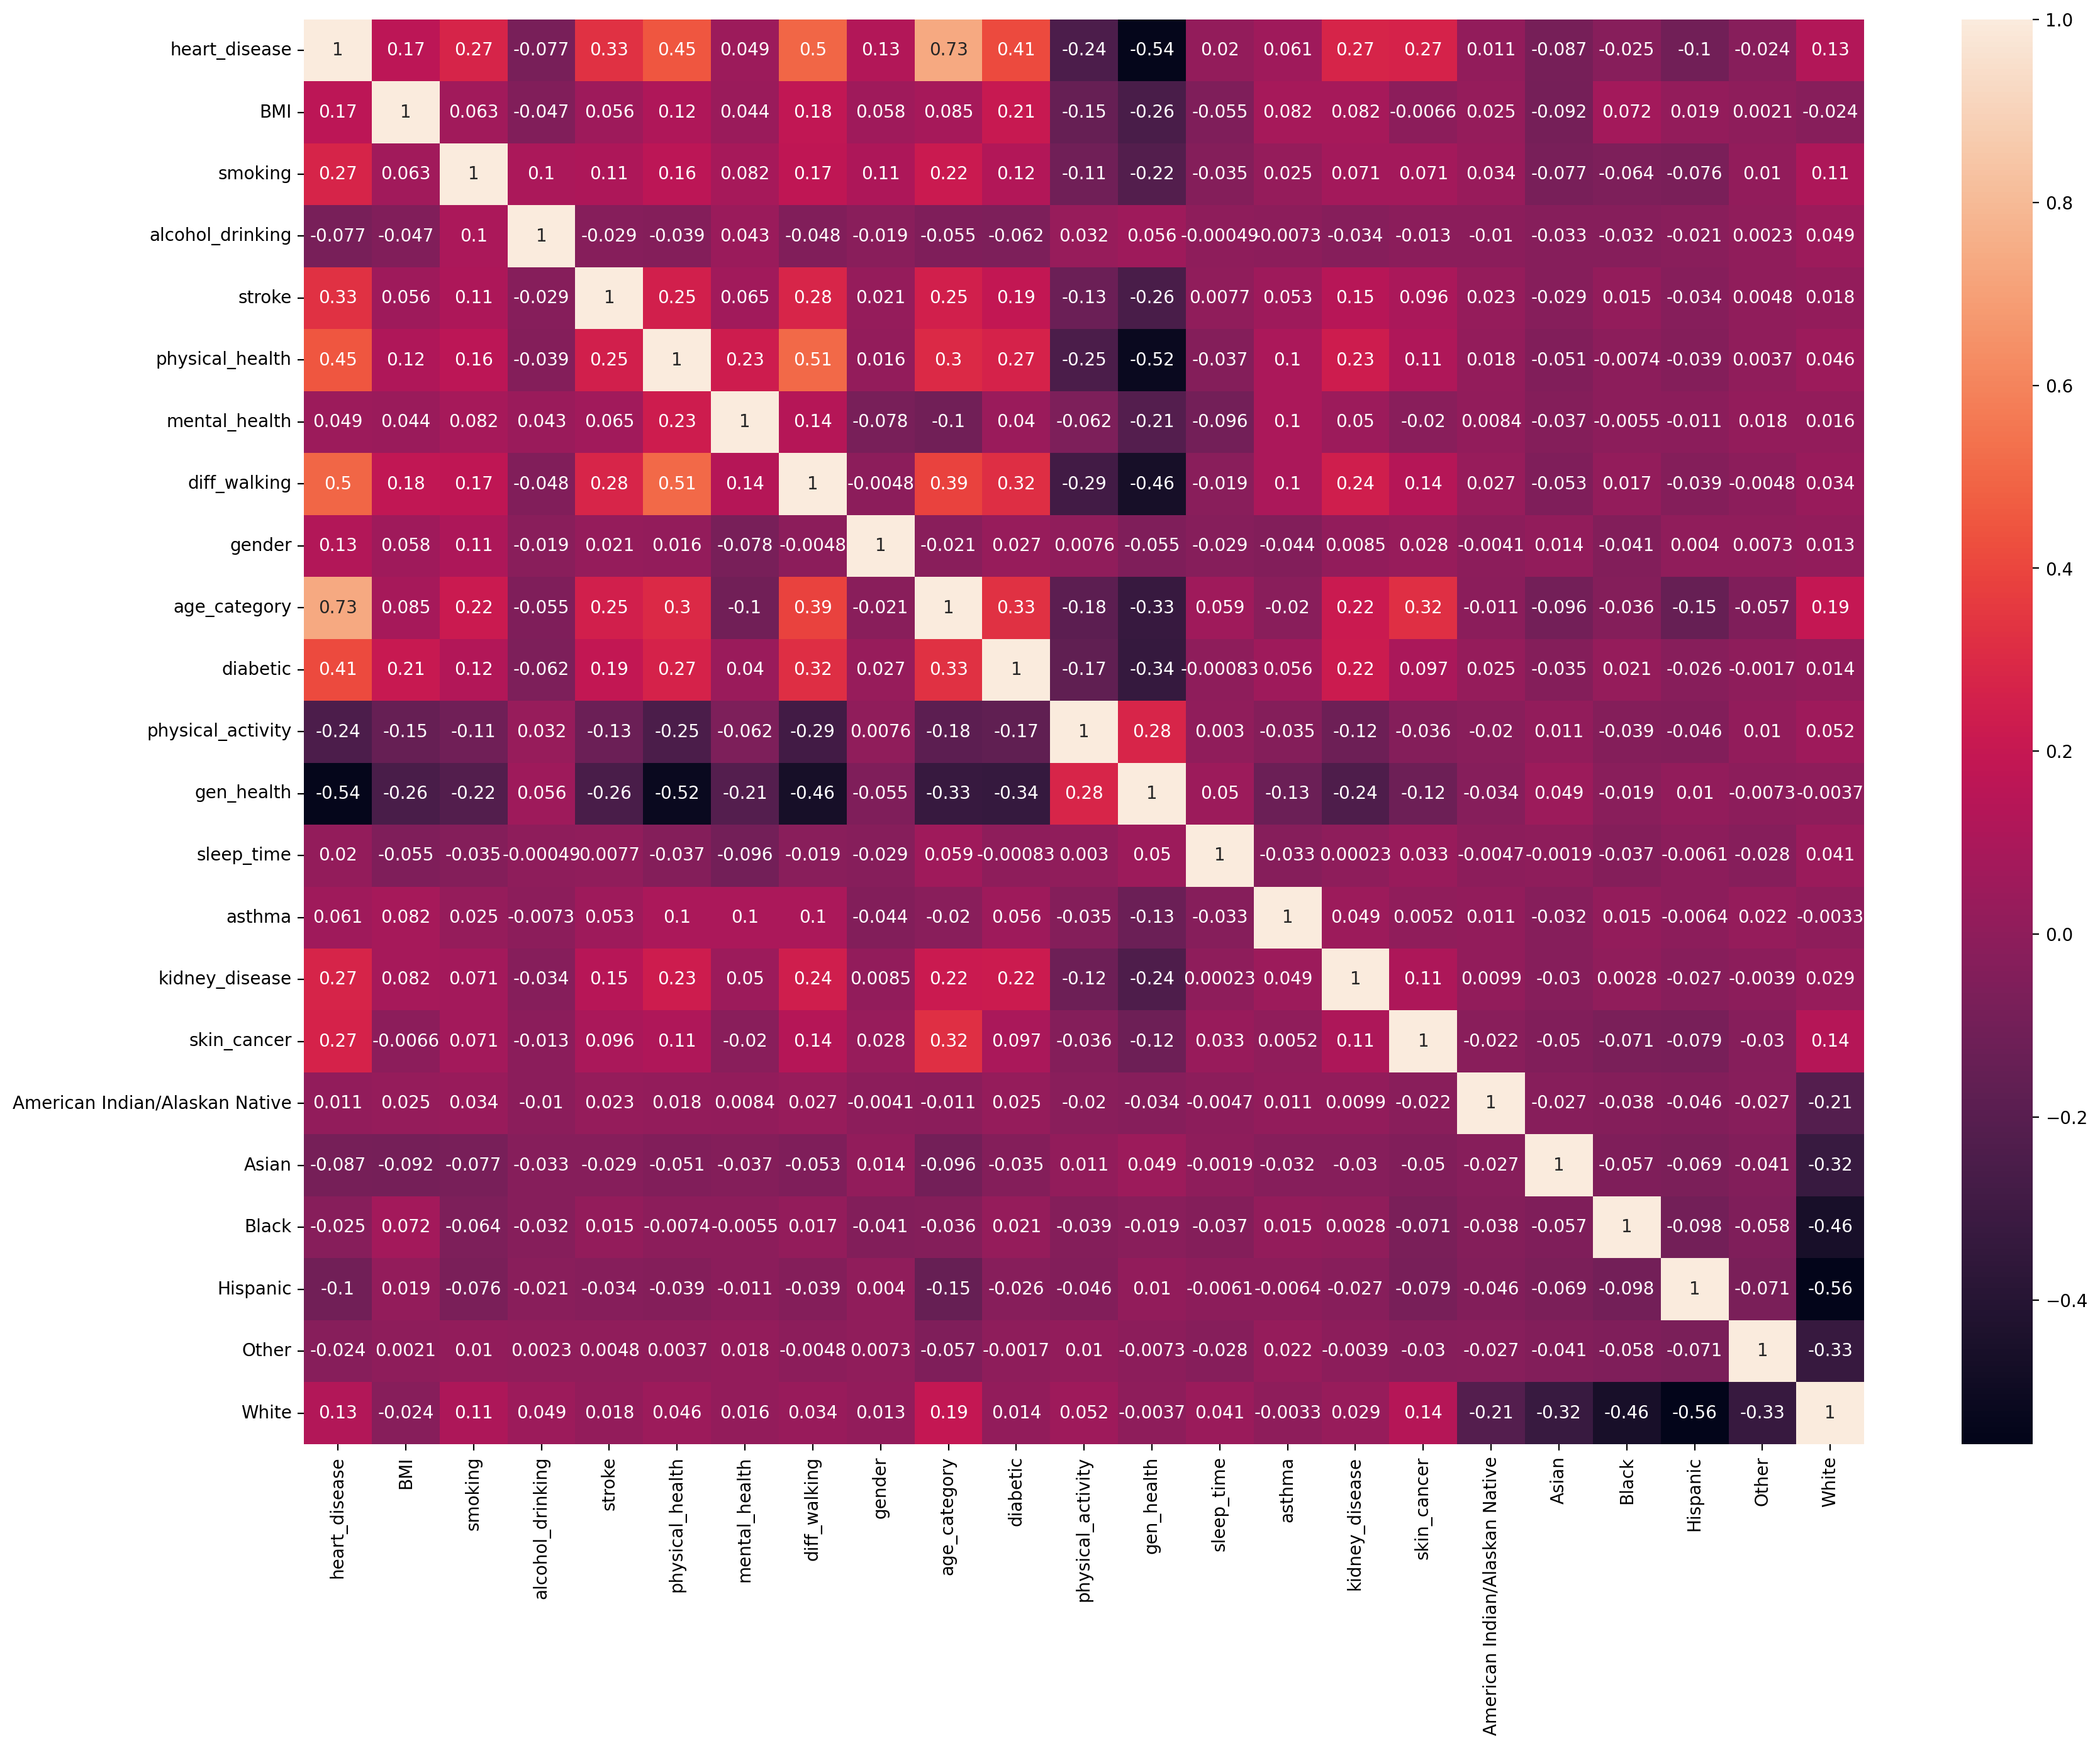

In [12]:
plt.figure(figsize=(20,15), dpi= 200)
sns.heatmap(df.corr() , annot=True);

In [13]:
correlation_df = pd.DataFrame(df.corr()['heart_disease']).reset_index().rename(columns = {'index':'features' , 
                                                                                          'heart_disease':'corr_with_heart_disease'})

sorted_corr_df = correlation_df.sort_values(by='corr_with_heart_disease',ascending=False).reset_index().drop('index', axis= 1)

corr_important_features = sorted_corr_df[(sorted_corr_df['corr_with_heart_disease'] > 0.25) | 
                                         (sorted_corr_df['corr_with_heart_disease'] < (-0.25))].drop(0).reset_index().drop('index', axis= 1)

corr_important_features

,features,corr_with_heart_disease
0,age_category,0.733243
1,diff_walking,0.497512
2,physical_health,0.447961
3,diabetic,0.410185
4,stroke,0.330345
5,smoking,0.272949
6,kidney_disease,0.270167
7,skin_cancer,0.267869
8,gen_health,-0.544570


## 3.2. Chi-Squared Feature Selection
### Since our data contains categorical input and categorical output, we can use scikit learn's chi-squared feature selection method.

In [14]:
from sklearn.feature_selection import SelectKBest, chi2

In [15]:
X = df.drop('heart_disease', axis= 1)
y = df['heart_disease']

fs = SelectKBest(score_func=chi2, k= 'all')
fs.fit_transform(X,y)

chi2_scores_df = pd.DataFrame({'features': df.columns[1:], 'chi2-scores': fs.scores_})
sorted_chi2_scores_df = chi2_scores_df.sort_values(by='chi2-scores',ascending=False).reset_index().drop('index', axis= 1)

sorted_chi2_scores_df.head(9)

,features,chi2-scores
0,physical_health,411616.660067
1,age_category,168300.993363
2,diff_walking,23944.146250
3,diabetic,16174.391946
4,gen_health,13080.540607
5,stroke,11274.947111
6,kidney_disease,7590.680773
7,skin_cancer,7236.677275
8,smoking,5150.489512


## 3.3. ANOVA Feature Selection

In [16]:
from sklearn.feature_selection import f_classif

In [17]:
X = df.drop('heart_disease', axis= 1)
y = df['heart_disease']

fs = SelectKBest(score_func= f_classif, k= 'all')
fs.fit_transform(X,y)

anova_scores_df = pd.DataFrame({'features': df.columns[1:], 'anova_scores': fs.scores_})
sorted_anova_scores_df = anova_scores_df.sort_values(by='anova_scores',ascending=False).reset_index().drop('index', axis= 1)

sorted_anova_scores_df.head(9)

,features,anova_scores
0,age_category,125690.692786
1,gen_health,45567.983293
2,diff_walking,35554.298130
3,physical_health,27135.314379
4,diabetic,21865.009392
5,stroke,13240.374799
6,smoking,8700.991202
7,kidney_disease,8510.620582
8,skin_cancer,8355.346930


<b><u>Observations</u>:</b>
- We can see that all of the 3 feature selection methods above, have the same top 9 important features that can be used as a subset instead of all the variables for classification.

### Saving a dataset of those 9 features subset

In [18]:
final_data = df.loc[:, corr_important_features['features'].values]
final_data.insert(0, column= 'heart_disease', value= df['heart_disease'])

final_data.head()

,heart_disease,age_category,diff_walking,physical_health,diabetic,stroke,smoking,kidney_disease,skin_cancer,gen_health
0,0,4,1,28,0,0,0,0,0,3
1,0,6,0,1,0,0,0,0,0,3
2,0,9,0,0,0,0,1,0,0,3
3,0,8,0,7,0,0,0,0,0,4
4,0,10,0,0,0,0,0,0,0,4


In [ ]:
final_data.to_csv('final_data.csv', index= False)

----------------------------

<a id= 'gridsearch'></a>
# | 4. Hyperparameter Tuning

In [2]:
df = pd.read_csv('final_data.csv')
df.head()

,heart_disease,age_category,diff_walking,physical_health,diabetic,stroke,smoking,kidney_disease,skin_cancer,gen_health
0,0,4,1,28,0,0,0,0,0,3
1,0,6,0,1,0,0,0,0,0,3
2,0,9,0,0,0,0,1,0,0,3
3,0,8,0,7,0,0,0,0,0,4
4,0,10,0,0,0,0,0,0,0,4


In [3]:
X = df.drop('heart_disease', axis= 1)
y = df['heart_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify= y, random_state= 101)

## 4.1. Logistic Regression Hyperparameter Tunning

In [6]:
model = LogisticRegression()

param_grid = {'solver' : ['newton-cg','lbfgs','liblinear', 'sag', 'saga'],
              'penalty': ['l2'],
              'C'      : [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(estimator= model, param_grid= param_grid, cv= 10, scoring= 'f1')
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.908004 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


## 4.2. Random Forest Hyperparameter Tunning

In [7]:
model = RandomForestClassifier(bootstrap = True, max_features= 'auto')

param_grid = {'n_estimators': [50, 100, 200],
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [1, 2, 3, 4, 5],
              'min_samples_split': [8, 10, 12]
             }

grid_search = GridSearchCV(estimator= model, param_grid= param_grid, cv= 10, scoring= 'f1')
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.907976 using {'criterion': 'gini', 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 50}


## 4.3. XGBoost Hyperparameter Tunning

In [10]:
model = XGBClassifier(objective= 'binary:logistic', nthread= 4)

param_grid = {'n_estimators' : [50, 100, 200],
              'max_depth'    : [4, 6, 8, 10, 12],
              'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.3]
             }

grid_search = GridSearchCV(estimator= model, param_grid= param_grid, cv= 10, scoring= 'f1')
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.908819 using {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}


<a id= 'evaluation'></a>
# | 5. Models Evaluation
### 5.1. Logistic Regression

In [13]:
log_model = LogisticRegression(solver= 'liblinear', penalty= 'l2', C= 0.1)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

log_training_score = log_model.score(X_train, y_train)
log_accuracy = accuracy_score(y_test, log_pred)
log_f1_score = f1_score(y_test, log_pred)
log_cm = confusion_matrix(y_test, log_pred)

print('Logistic Regresion:')
print('-------------------')
print(f'Training Score: {round(float(log_training_score)*100,2)}%')
print(f'Model Accuracy: {round(float(log_accuracy)*100,2)}%')
print(f'F1-Score: {round(float(log_f1_score)*100,2)}%')
print(f'\nEvaluation Confusion Matrix:\n{log_cm}')
print(f'\n\n{classification_report(y_test, log_pred)}')

Logistic Regresion:
-------------------
Training Score: 95.52%
Model Accuracy: 95.43%
F1-Score: 90.66%

Evaluation Confusion Matrix:
[[15839   328]
 [  659  4793]]


              precision    recall  f1-score   support

           0       0.96      0.98      0.97     16167
           1       0.94      0.88      0.91      5452

    accuracy                           0.95     21619
   macro avg       0.95      0.93      0.94     21619
weighted avg       0.95      0.95      0.95     21619



### 5.2. XBGoost

In [14]:
xg_model = XGBClassifier(objective= 'binary:logistic',
                         nthread= 4,
                         max_depth= 4,
                         learning_rate= 0.1,
                         n_estimators= 200)

xg_model.fit(X_train, y_train)
xg_pred = xg_model.predict(X_test)
xg_training_score = xg_model.score(X_train, y_train)
xg_accuracy = accuracy_score(y_test, xg_pred)
xg_f1_score = f1_score(y_test, xg_pred)
xg_cm = confusion_matrix(y_test, xg_pred)

print('XGBoost Classifier:')
print('-------------------')
print(f'Training Score: {round(float(xg_training_score)*100,2)}%')
print(f'Model Accuracy: {round(float(xg_accuracy)*100,2)}%')
print(f'F1-Score: {round(float(xg_f1_score)*100,2)}%')
print(f'\nConfusion Matrix:\n{xg_cm}')
print(f'\n\n{classification_report(y_test, xg_pred)}')

XGBoost Classifier:
-------------------
Training Score: 95.67%
Model Accuracy: 95.48%
F1-Score: 90.7%

Confusion Matrix:
[[15875   292]
 [  685  4767]]


              precision    recall  f1-score   support

           0       0.96      0.98      0.97     16167
           1       0.94      0.87      0.91      5452

    accuracy                           0.95     21619
   macro avg       0.95      0.93      0.94     21619
weighted avg       0.95      0.95      0.95     21619



### 5.3. Random Forest

In [15]:
rf_model = RandomForestClassifier(n_estimators= 50,
                                  criterion= 'gini',
                                  max_features= 'auto',
                                  bootstrap= True,
                                  min_samples_leaf= 3,
                                  min_samples_split= 8)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_training_score = rf_model.score(X_train, y_train)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1_score = f1_score(y_test, rf_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

print('Random Forest Classifier:')
print('-------------------------')
print(f'Training Score: {round(float(rf_training_score)*100,2)}%')
print(f'Model Accuracy: {round(float(rf_accuracy)*100,2)}%')
print(f'F1-Score: {round(float(rf_f1_score)*100,2)}%')
print(f'\nConfusion Matrix:\n{rf_cm}')
print(f'\n\n{classification_report(y_test, rf_pred)}')

Random Forest Classifier:
-------------------------
Training Score: 95.82%
Model Accuracy: 95.42%
F1-Score: 90.59%

Confusion Matrix:
[[15864   303]
 [  687  4765]]


              precision    recall  f1-score   support

           0       0.96      0.98      0.97     16167
           1       0.94      0.87      0.91      5452

    accuracy                           0.95     21619
   macro avg       0.95      0.93      0.94     21619
weighted avg       0.95      0.95      0.95     21619



# | 6. Voting Classifier

In [4]:
estimators = []
estimators.append(('LR', 
                  LogisticRegression(solver ='liblinear', 
                                     penalty= 'l2',
                                     C= 0.1)))

estimators.append(('XGB', XGBClassifier(objective= 'binary:logistic',
                                        nthread= 4,
                                        max_depth= 4,
                                        learning_rate= 0.1,
                                        n_estimators= 200)))

estimators.append(('RF', RandomForestClassifier(n_estimators= 50,
                                                criterion= 'gini',
                                                max_features= 'auto',
                                                bootstrap= True,
                                                min_samples_leaf= 3,
                                                min_samples_split= 8)))


model = VotingClassifier(estimators= estimators, voting= 'hard')
model.fit(X_train, y_train)
model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     16167
           1       0.94      0.88      0.91      5452

    accuracy                           0.95     21619
   macro avg       0.95      0.93      0.94     21619
weighted avg       0.95      0.95      0.95     21619



<a id= 'saving'></a>

# | 7. Model Saving

In [5]:
joblib.dump(model, 'model.h5')

['model.h5']